# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
from numpy.random import seed
medical = pd.read_csv('C:\\Users\\Anne\\Documents\\SPRINGBOARDGITHUB\\TheFoxerine\\11_1_Frequentist_Case_Study\\insurance2.csv')

In [39]:
medical.shape

(1338, 8)

In [40]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A: 
The mean of medical charges is $13,270.42 and the standard deviation is +/-12,110.01. 

The distribution of the charges is skewed to the right (positive skewdness). 

Plotting the distribution with different bin sizes (10,20,40) suggest a trimodal distribution:
    - The first distribution goes from 0 to the mean (or ~ $13,000)
    - The second distribution goes from the mean to about $30,000
    - The last distribution goes from $30,000 to $50,000.
    
The calculated stats (mean and std) are not helpful here because the distribution is not a normal distribution.

the mean of charges is:  13270.42  and the standard deviation is:  12110.01


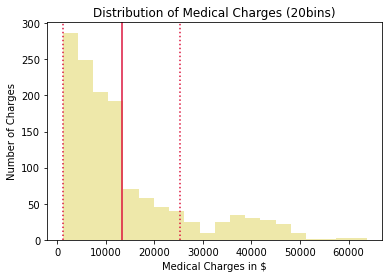

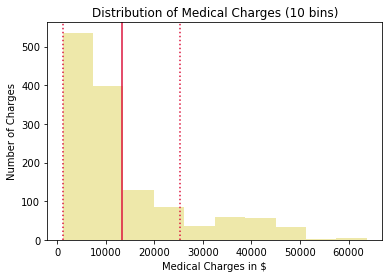

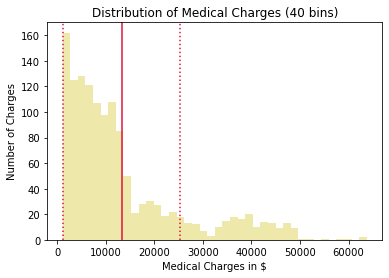

In [41]:
# I am calculating the mean and std of medical charges first to plot these stats in the histogram. 
# The divisor for std is n-1 (ddof is passed in charges_std)
charges_mean=np.mean(medical.charges)
charges_std=np.std(medical.charges, ddof=1)
print('the mean of charges is: ',round(charges_mean,2),' and the standard deviation is: ',round(charges_std,2))

# Plotting the histogran showing the distribution of medical charges with 20 bins
_ =plt.hist(medical.charges,bins=20,color='palegoldenrod')
_ =plt.xlabel('Medical Charges in $')
_ =plt.ylabel('Number of Charges')
_ =plt.title('Distribution of Medical Charges (20bins)')
_ = plt.axvline(charges_mean, color='crimson', linestyle='-')
_ = plt.axvline(charges_mean+charges_std, color='crimson', linestyle=':')
_ = plt.axvline(charges_mean-charges_std, color='crimson', linestyle=':')
plt.show()

# Plotting the histogran showing the distribution of medical charges with 10 bins
_ =plt.hist(medical.charges,bins=10,color='palegoldenrod')
_ =plt.xlabel('Medical Charges in $')
_ =plt.ylabel('Number of Charges')
_ =plt.title('Distribution of Medical Charges (10 bins)')
_ = plt.axvline(charges_mean, color='crimson', linestyle='-')
_ = plt.axvline(charges_mean+charges_std, color='crimson', linestyle=':')
_ = plt.axvline(charges_mean-charges_std, color='crimson', linestyle=':')
plt.show()

# Plotting the histogran showing the distribution of medical charges with 40 bins
_ =plt.hist(medical.charges,bins=40,color='palegoldenrod')
_ =plt.xlabel('Medical Charges in $')
_ =plt.ylabel('Number of Charges')
_ =plt.title('Distribution of Medical Charges (40 bins)')
_ = plt.axvline(charges_mean, color='crimson', linestyle='-')
_ = plt.axvline(charges_mean+charges_std, color='crimson', linestyle=':')
_ = plt.axvline(charges_mean-charges_std, color='crimson', linestyle=':')
plt.show()

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A: The distribution of the medical charges is rather complicated to work with which makes it a good case for bootstrapping or t-stats test. Bootstrapping could assess the properties of the distribution. T-test can help us rejecting or accpeting the null hypothesis which is 'the average mean of charges falls below $12,000'. It looks like T-test will be applied in this case.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A: The t-stats will provide the ratio of the departure of the known mean ($13,270) from its hypothesized value ($12,000) to its standard error. This is a one-sided confidence interval, with a negative tail (tail to the left). Picturing a distribution curve, the 'fail area' would be to the left of $12,000 because the administrator does not want the mean medical charge to fall below this amount.
Assuming a confidence interval of 95%, a degree of freedom of '1338-1', I use scipy t.ppf to get the critical value t. Then I use the value to calculate the left bound of the confidence interval.

The results are :
     t is -1.65.
     the left bound of the confidence interval is $12,725.
     there is no right bound because it is a one-side (left) tailed test.
     
The administrator should not be concerned because the lower bound of the confidence interval is above the $12,000 operation threshold.

Then I ran a t-test assuming the null hypothesis is "the mean charges will fall under $12,000" using scipy ttest_1samp. I had to divide p by 2 because ttest_1samp runs a double tailed test. The result of the test rejects the null hypothesis - p(12,000)<<p(pop). Therefore the administrator should not worry.
  

In [58]:
# Calculate the critical value and the relevant 95% confidence interval for the mean,

# To get the critical value  for a confidence interval of 95%
# I am using t.ppf from scipy using a degree of freedom n-1
prob=0.95
deg_freedom=1337
tvalue = t.ppf(prob, deg_freedom)
print('the critical value ', round(tvalue,2), ' covers 95% of the observation in the distribution')
moe=tvalue*charges_std/(np.sqrt(1337))
left_bound=charges_mean-moe
print('the left bound of the confidence interval is: ',round(left_bound,2),' which is above $12,000')

# the t-test function provided by scipy does a two-tail test.
# So I am using the function below to divide p by 2 to get a one tail
# The function t_one_tailed has the option to be left sided or right sided by passing
# the alternative argument "greater" or "less", respectively.
def t_one_tailed(data, popmean, alpha=0.05, alternative='greater'):
    tv, p = scs.ttest_1samp(data, popmean)
    print ('t:',tv)
    print ('p:',p)
    if alternative == 'greater' and (p/2 < alpha) and tv > 0:
        print ('Reject Null Hypothesis')
    if alternative == 'less' and (p/2 < alpha) and tv < 0:
        print ('Reject Null Hypothesis')
       
t_one_tailed(medical.charges,12000,alpha=0.05,alternative='greater')

the critical value  1.65  covers 95% of the observation in the distribution
the left bound of the confidence interval is:  12725.28  which is above $12,000
t: 3.8373517196585314
p: 0.000130171652092872
Reject Null Hypothesis


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:
In t-test we assume that the variance of the two groups are the same in the standard deviation.

The null hypothesis is "people with insurance are charged the same amount that the one without insurance". 

The alternate hypothesis is "people without insurance are charged a different amount".

In other word, we are expecting the average charges to be same or different, respectively.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [71]:
# manually...
# Extracting parameters...
# The table 'insured' will contain all the information from insured patients.
# The table 'notinsured' will contain all the information from non-insured patients.
insured=medical[medical.insuranceclaim==1]
notinsured=medical[medical.insuranceclaim==0]
print(insured.head())
print(notinsured.head())

# Parameters needed for the calculation
n0=len(insured.charges)
n1=len(notinsured.charges)
s0=np.std(insured.charges, ddof=1)
s1=np.std(notinsured.charges, ddof=1)
x0=np.mean(insured.charges)
x1=np.mean(notinsured.charges)


    age  sex    bmi  children  smoker  region     charges  insuranceclaim
0    19    0  27.90         0       1       3  16884.9240               1
1    18    1  33.77         1       0       2   1725.5523               1
4    32    1  28.88         0       0       1   3866.8552               1
6    46    0  33.44         1       0       2   8240.5896               1
10   25    1  26.22         0       0       0   2721.3208               1
   age  sex     bmi  children  smoker  region      charges  insuranceclaim
2   28    1  33.000         3       0       2   4449.46200               0
3   33    1  22.705         0       0       1  21984.47061               0
5   31    0  25.740         0       0       2   3756.62160               0
7   37    0  27.740         3       0       1   7281.50560               0
8   37    1  29.830         2       0       0   6406.41070               0


In [78]:
# manual calculation
sp=np.sqrt((((n0-1)*s0**2)+((n1-1)*s1**2))/(n0+n1-2))
tt=(x0-x1)/(sp*np.sqrt((1/n0)+(1/n1)))

print(round(sp,2),round(tt,2))
print('A t-table for t(0.05,1000+) gives a value of 1.645.\nThe calculated t value, ',tt,' is superior to the expected 1.645 value.\nThe null hypothesis can be rejected.\nPeople with insurance are not charge the same amount as people without insurance.')



11520.03 11.89
A t-table for t(0.05,1000+) gives a value of 1.645.
The calculated t value,  11.89329903087671  is superior to the expected 1.645 value.
The null hypothesis can be rejected.
People with insurance are not charge the same amount as people without insurance.


In [79]:
# I am using scipy ttest_ind which is a two-sided test for the null hypothesis 
# that 2 independent samples have identical average (expected) values. 
# This test assumes that the populations have identical variances by default
def t_twosamples(data0,data1, alpha=0.05, expectedt=1.645):
    tv, p = scs.ttest_ind(data0,data1)
    print ('t:',tv)
    print ('p:',p)
    if expectedt<tv and (p/2 < alpha):
        print ('Reject Null Hypothesis')
    if expectedt>=tv and (p/2 < alpha):
        print ('Accept Null Hypothesis')
       


In [80]:
t_twosamples(insured.charges,notinsured.charges,alpha=0.05,expectedt=1.645)

t: 11.893299030876712
p: 4.461230231620717e-31
Reject Null Hypothesis


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A: I cannot find an equivalent function using z-test in scipy. One of the reason to use a two sample t-test instead od a z-test is that for a t-test the variances  of the two samples are unknown and are assumed equal. The t-test function in Scipy allows for enabling and disabling this assumption by passing equal_var=True or equal_var=False, respectively.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test